# Lab01: Initial Value Problems
Due date: 11:59pm September 10, 2019<br>
Connor Poetzinger

### 1. Introduction 

This lab covers Newton's method, Lagrange interpolation and forward and backward Euler.

###  2. Newton's Method

Create a function *Newtons_Method* to find the root(s) of a function *f(x)*. Start from an initial guess *x0*, to successively better the approximation of the root. If *f(x)* has continuous derivatives, Newton's method will converge to x<sup>*</sup> if our initial guess is reasonable.

\begin{equation*}
x_{k+1} = x_k - \frac{f(x_k)}{f^{'}(x_k)}
\end{equation*}

### 2.3 Code Deliverable 

In [67]:
import numpy as np
import pandas as pd 

def newtons_method(maxIter, tol, f, f_prime, x0):
    """
    Implementation of Newton's Method
    Input: 
        maxIter - maximum number of iterations
        tol - telerance used for stopping criteria 
        f - the function handle for the function f(x)
        f_prime - the function handle for the function's derivative
        x0 - the initial point 
    Output: 
        x1 - approximations 
        iter - numbre of iterations 
    """
    #begin counting iterations 
    iter = 0
    
    #data list 
    dat = []
    
    #iterate while the iteration counter is less than your iteration cap and 
    #the function value is not close to 0
    while (iter < maxIter and abs(f(x0)) > tol):
        
        #Newton's method definition 
        x1 = x0 - f(x0)/f_prime(x0)
        
        #update counter 
        iter += 1
        
        #disrupt loop if error is less than your tolerance 
        if (abs(x1 - x0) < tol):
            break
        #update position
        else:
            x0 = x1
            
#         print(iter, x1)
        data = {"Iteration": [iter], "Approximation": [x1], "|x_k - 1|": ["{:.2e}".format(abs(x1 -1))]}
        dat.append(data)
        df = pd.DataFrame(dat)
    return df

In [68]:
def f(x):
    """
    Function definition for f(x)
    """
    #return f(x) = x^2 - 1
    return x**2 - 1

def f_prime(x):
    """
    Function definition for the derivative of f(x)
    """
    #return derivative of f(x) = x^2 - 1 --> 2x
    return 2*x

### 2.4 Code Check

In [69]:
newtons_method(6, 1.0*10**-8, f, f_prime, 2)
#["{:.2e}".format(abs(x1 -1))]

,Iteration,Approximation,|x_k - 1|
0,[1],[1.25],[2.50e-01]
1,[2],[1.025],[2.50e-02]
2,[3],[1.0003048780487804],[3.05e-04]
3,[4],[1.0000000464611474],[4.65e-08]
4,[5],[1.000000000000001],[1.11e-15]


### 3. Lagrange Interpolation

Create a function *lagrange_interp* to find the value of the Lagrange Interpolation polynomial evaluated at a point *x*. We define the Lagrange interpolation polynomial

\begin{equation*}
p(x): = \sum_{i=1}^n y_i L_i (x)
\end{equation*}

The Lagrange polynomials are defined as 

\begin{equation*}
L_i (x) := \prod_{j=0, j\neq1} \frac{x - x_j}{x_i - x_j}
\end{equation*}

### 3.1 Code Deliverable

In [70]:
#import external modules
import numpy as np

def lagrange_interp(x, xvals, yvals):
    """
    Input:
        x - interpolation points. All four values are set to one variable and indexed at function call
        xvals - target points equispaced using linspace(-1, 1, 500)
        yvals - function values evaluated at the interpolation points
    Output: 
        y - the value of the Lagrange interpolation polynomial evaluated at the point x
    """
    #get the length of the interpolation points
    # this variable will be used to assign the limit of iteration 
    n = len(x)
    
    #call basis function to calculate vector of lagrange polynomials 
    lagrange_poly = lagrange_basis(x, xvals)
    
    #assign y to 0
    y = 0
    
    #iterate
    for i in range(n):
        #calculate the sum of element wise multiplication of the function values
        #yvals and basis vector created by lagrange_basis
        y += yvals[i] * lagrange_poly[i]
    return y 

def lagrange_basis(x, xvals):
    """
    Input: 
        x - interpolation points. All four values are set to one variable and indexed at function call
        xvals - target points equispaced using linspace(-1, 1, 500)
    Output:
        y - returns a vector of lagrange polynomials evaluated at the target point x
    """
    #get the length of the interpolation points
    # this variable will be used to assign the limit of iteration 
    n = len(x)
    
    #preallocate y variable with 500 1's
    y = np.ones(n)
    
    for i in range(n):
        for j in range(n):
            #constraint to prevent i = j
            if i != j:
                #calculate lagrange polynomials evaluated at the target point
                #*= to find product 
                y[i] *= (xvals - x[j]) / (x[i] - x[j])
    return y 

### 3.2.1 Runge Phenomenon

\begin{equation*}
f(x) = \frac{1}{1 + 25x^2} \> \> \> x[-1,1]
\end{equation*}

Evaluate the interpolant of f(x) at a set of target points. We use 500 equispaced points in [-1, 1] for the target points. Using n = 3, 5, 9, 17, plot p(x) and f(x) on the same plot for each n. Also plot the differences of f(x) and p(x) for each case.

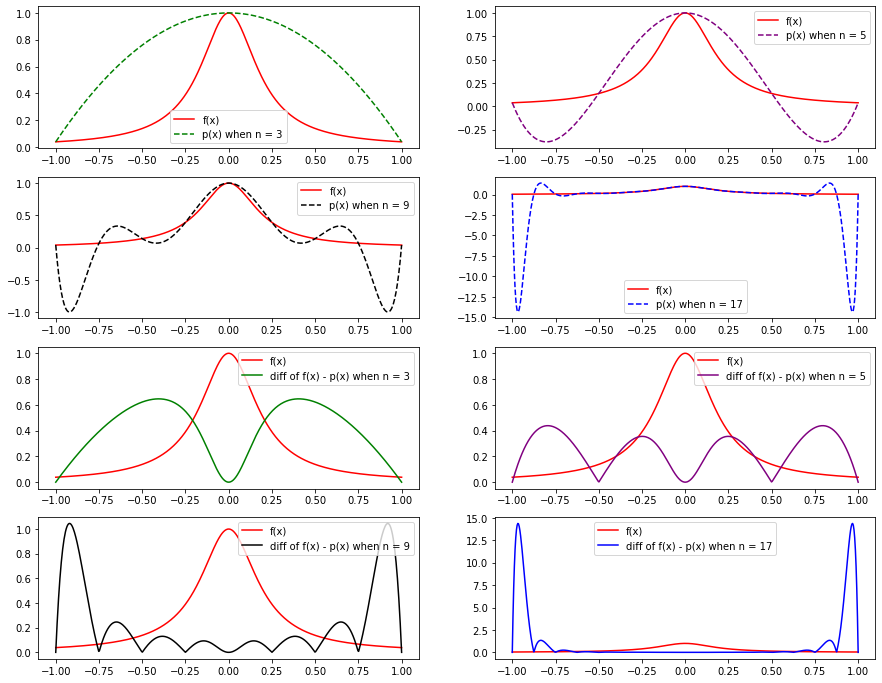

In [71]:
#import external modules
import matplotlib.pyplot as plt 
%matplotlib inline

#runge function 
runge = lambda x: 1/(1 + 25*x**2)

#500 equispaced target points in [-1, 1]
xvals = np.linspace(-1, 1, 500)

#interpolation points using list comprehension for code redundency. 
x = [np.linspace(-1, 1, q) for q in [3, 5, 9, 17]]

#initialize polynomials with size 500
p1 = np.zeros(500)
p2 = np.zeros(500)
p3 = np.zeros(500)
p4 = np.zeros(500)

#call function lagrange_interp using list comprehension
#x[1..4] is interpolation points indexed at different n values 
#xvals[i] is iterating through the length of p(s) (500) to be used in lagrange_basis to subtract from x[j]
#runge(x[1..4]) calls the runge function evaluated at each set of interpolation points
p1 = [lagrange_interp(x[0], xvals[i], runge(x[0])) for i in range(len(p1))]
p2 = [lagrange_interp(x[1], xvals[i], runge(x[1])) for i in range(len(p2))]
p3 = [lagrange_interp(x[2], xvals[i], runge(x[2])) for i in range(len(p3))]
p4 = [lagrange_interp(x[3], xvals[i], runge(x[3])) for i in range(len(p4))]

#Calculate differences of f(x) and p(x) for each case
#DOUBLE CHECK THAT YOU TAKE THE ABSOLUTE VALUE OF THE DIFFERENCE 
diff1 = np.abs(runge(xvals) - p1)
diff2 = np.abs(runge(xvals) - p2)
diff3 = np.abs(runge(xvals) - p3)
diff4 = np.abs(runge(xvals) - p4)

#plotting (find better way to limit repeated code)
plt.figure(1, figsize=(15, 12))
plt.subplot(4,2,1)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, p1, color='green', linestyle='dashed', label='p(x) when n = 3')
plt.legend()

plt.subplot(4,2,2)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, p2, color='purple', linestyle='dashed', label='p(x) when n = 5')
plt.legend()

plt.subplot(4,2,3)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, p3, color='black', linestyle='dashed', label='p(x) when n = 9')
plt.legend()

plt.subplot(4,2,4)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, p4, color='blue', linestyle='dashed', label='p(x) when n = 17')
plt.legend()

plt.subplot(4,2,5)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, diff1, color='green', label='diff of f(x) - p(x) when n = 3')
plt.legend()

plt.subplot(4,2,6)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, diff2, color='purple', label='diff of f(x) - p(x) when n = 5')
plt.legend()

plt.subplot(4,2,7)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, diff3, color='black', label='diff of f(x) - p(x) when n = 9')
plt.legend()

plt.subplot(4,2,8)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, diff4, color='blue', label='diff of f(x) - p(x) when n = 17')
plt.legend()

#### 3.2.1 Runge Phenomenon Results 

For the first four plots the discrete solutions of p(x) at dt = 1/4, 1/8, 1/16, 1/32, 1/64 are plotted and represented as a dotted line. The solid curve in red is the exact solution f(x) (Runge function) evaluated at target points *xvals*. From these figures, the discrete approximations appear to be approaching the exact solution as dt decreases. At n = 17 (graph 4) we can see that the interpolating polynomial does a particularly poor job of interpolating near the enpoints of the interval [-1,1]. Although the interpolating polynomial is doing a better job of fitting the original function in the middle, the interpolant it is oscillating at the edges, which causes the error to increase without bound when the degree of the polynomial is increased. This is known as Runge's Phenomenon, this occurs when the magnitude of the n-th order derivatives of the particular function grows quickly when n increases and if the interpolation points are equispaced. To combat this problem, we can use points that are distributed more densely towards the edges of the interval to minimize the oscillation. These points are called Chebyshev points and its implementationwill be shown in the next couple of cells.

### 3.2.2 Chebyshev Points

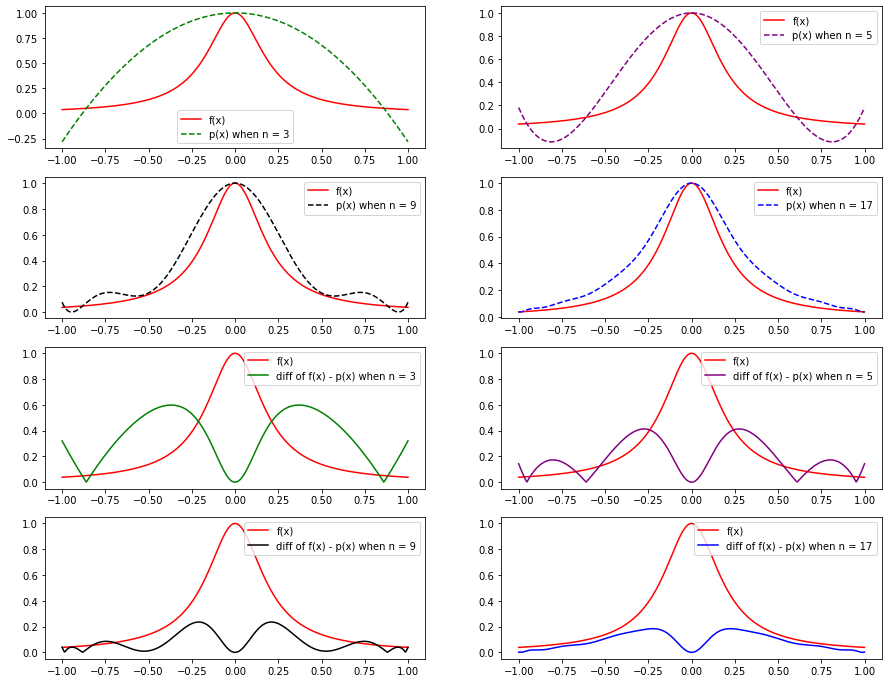

In [72]:
#import external modules
import matplotlib.pyplot as plt 
%matplotlib inline

#Grab all values for n 
n = [len(x[i]) for i in range(len(x))]

#evaluate Chebyshev point 
c1 = [np.cos(np.pi * (2 * k - 1) / (2 * n[0])) for k in range(1, n[0]+1)]
c2 = [np.cos(np.pi * (2 * k - 1) / (2 * n[1])) for k in range(1, n[1]+1)]
c3 = [np.cos(np.pi * (2 * k - 1) / (2 * n[2])) for k in range(1, n[2]+1)]
c4 = [np.cos(np.pi * (2 * k - 1) / (2 * n[3])) for k in range(1, n[3]+1)]

#call function lagrange_interp using list comprehension
#c1..4 is interpolation points indexed at different n values 
#xvals[i] is iterating through the length of p(s) (500) to be used in lagrange_basis to subtract from x[j]
#runge(x[1..4]) calls the runge function evaluated at each set of interpolation points
cc1 = [lagrange_interp(c1, xvals[i], runge(x[0])) for i in range(len(p4))]
cc2 = [lagrange_interp(c2, xvals[i], runge(x[1])) for i in range(len(p4))]
cc3 = [lagrange_interp(c3, xvals[i], runge(x[2])) for i in range(len(p4))]
cc4 = [lagrange_interp(c4, xvals[i], runge(x[3])) for i in range(len(p4))]

#Calculate differences of f(x) and p(x) for each case
#DOUBLE CHECK THAT YOU TAKE THE ABSOLUTE VALUE OF THE DIFFERENCE 
cdiff1 = np.abs(runge(xvals) - cc1)
cdiff2 = np.abs(runge(xvals) - cc2)
cdiff3 = np.abs(runge(xvals) - cc3)
cdiff4 = np.abs(runge(xvals) - cc4)

#plotting (find better way to limit repeated code)
plt.figure(1, figsize=(15, 12))
plt.subplot(4,2,1)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, cc1, color='green', linestyle='dashed', label='p(x) when n = 3')
plt.legend()

plt.subplot(4,2,2)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, cc2, color='purple', linestyle='dashed', label='p(x) when n = 5')
plt.legend()

plt.subplot(4,2,3)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, cc3, color='black', linestyle='dashed', label='p(x) when n = 9')
plt.legend()

plt.subplot(4,2,4)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, cc4, color='blue', linestyle='dashed', label='p(x) when n = 17')
plt.legend()

plt.subplot(4,2,5)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, cdiff1, color='green', label='diff of f(x) - p(x) when n = 3')
plt.legend()

plt.subplot(4,2,6)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, cdiff2, color='purple', label='diff of f(x) - p(x) when n = 5')
plt.legend()

plt.subplot(4,2,7)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, cdiff3, color='black', label='diff of f(x) - p(x) when n = 9')
plt.legend()

plt.subplot(4,2,8)
plt.plot(xvals, runge(xvals), color='red', label='f(x)')
plt.plot(xvals, cdiff4, color='blue', label='diff of f(x) - p(x) when n = 17')
plt.legend()

### 3.2.2 Chebychev Results

### 4. Euler Methods

### 4.1 Forward Euler

Create a function, *Forward_Euler* to find an approximate solution *Y<sup>n</sup>*, at discrete time steps. The forward, or explicit, Euler method is:

\begin{equation*}
Y^{n+1} := Y^n + dtf(Y^n, t^n)
\end{equation*}

### 4.2 Code Deliverable

In [73]:
#import external modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# def forward_euler(y0, t0, tf, dt, f):
def forward_euler(f, t, y0, dt):
    """
    Implementation of the Forward Euler method 
    y[i+1] = y[i] + h * f(x[i], y[i]) where f(x[i], y[i]) is the differntial 
    equation evaluated at x[i] and y[i]
    Input:
        f - function f(y,t)
        t - data structure is a numpy array with t[0] initial time and t[-1] final time
        y0 - data structure is a numpy array with initial value 1.0
        dt - data structure is a numpy array time step
    Output:
        x - vector of time steps 
        y - vector of approximate solutions
    """
    #Initialize error vector
    err = []
    
    #iterate through eatch delta t 
    for h in dt:
        
        #return evenly spaced values between 0.0 and 1.0+h with itervals of h
        #this creates time intervals  
        x = np.arange(t[0], t[-1]+h, h)
        
        #initialize y by returning a numpy array with shape 101, filled with zeros 
        #this preallocation is necessary for time reasons and to add values into array
        y = np.zeros(len(x+1))
        
        #assign time at position 0 to starting time (0.0) and set approximation at time 
        #step 0 = 1.0 which is the initial value given 
        x[0], y[0] = t[0] ,y0
        
        #apply Euler's method 
        for i in range(1, len(x)):
            y[i] = y[i-1] + h * f(x[i - 1], y[i - 1])
        
        #calculate error and append values for each h to err list
        e = [np.abs(y[-1] - exact(x[-1]))]
        err.append(e)
    
    #Plot log log plot 
    plt.loglog(dt, err)
    plt.title("Error for each dt when t = 1");plt.xlabel('Step size dt'); plt.ylabel("Error")
    
    #return time (x) and approximations (y)
    return x, y, err


def f(t, y):
    """ 
    IVP function y'(t) to approximate the derivative
    """
    return -(t * (np.exp((-t**2)/2)))

def exact(t):
    """
    IVP function that provides the exact solution  to y(t)
    """
    return np.exp((-t**2)/2)

### 4.3 Exponential Problem

Applied forward Euler to the IVP

\begin{equation*}
y^{(t)} = -ty(t), \> \> \> y(0) = 1
\end{equation*}

This IVP has the exact solution 

\begin{equation*}
y^{(t)} = e^{\frac{-t^2}{2}} \> \> \> for\> \> \>
0 \leq t \leq 1
\end{equation*}

Slope of log log plot  1.0475


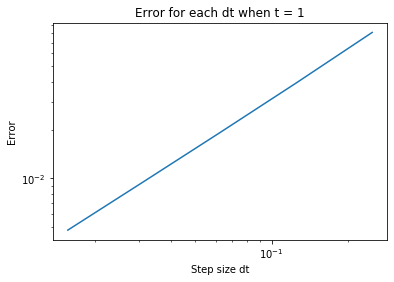

In [74]:
# initial values 
#list comprehension to create dt values [1/4, 1/8, 1/16, 1/32, 1/64]
dt = np.asarray([1/(2**x) for x in range(2,7)])

#initialize t(start) and t(final) can index them as start (t[0]) final (t[-1])
t = np.array([0.0, 1.0])

#IVP initial value y(0) = 1
y0 = np.array([1.0])

#call function forward_euler
ts, ys, err = forward_euler(f, t, y0, dt)

#Calculate slope of log log plot to find order of convergence
m = (np.log(0.03921168127346486/0.08104772493658174)/np.log(0.125/0.25))
print("Slope of log log plot ", round(m, 4))

In a Log-Log plot, the order of covergennce is simply the slope of the data. As depicted by the curvature of the plot above, one can infer that the order of convergence is linear of accuracy n. To confirm this, I calculate the slope of the line and find that m = 1.0475. Thus, log(error) = O(n). 

### 4.4 Backward Euler

A simple variation of the forward Euler method is the backward (implicit) Euler method. Starting from y<sup>0</sup> = y(t<sub>0</sub>), we get {Y<sup>n</sup>} from 

\begin{equation*}
Y^{n+1} := Y^n + dtf(Y^{n+1}, t^{n+1})
\end{equation*}

### 4.5 Code Deliverable

In [75]:
#import external modules 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Psudocode of Backward Euler 
def backward_euler(y0, t, dt, f, fdy):
    
    #Initialize error vector
    err = []
    
    #iterate through eatch delta t 
    for h in dt:
        
        #return evenly spaced values between 0.0 and 1.0+h with itervals of h
        #this creates time intervals  
        T = np.arange(t[0], t[-1]+h, h)
        
        #initialize y by returning a numpy array with shape 101, filled with zeros 
        #this preallocation is necessary for time reasons and to add values into array
        Y = np.zeros(len(T+1),dtype=object)
        
        #assign time at position 0 to starting time (0.0) and set approximation at time 
        #step 0 = 1.0 which is the initial value given 
        T[0], Y[0] = t[0] ,y0
        
        #apply Euler's method 
        for i in range(1, len(T)):

            Y[i] = backward_euler_step(Y[i-1], T[i], h, f, fdy)
        
        #calculate error and append values for each h to err list
        e = np.abs(Y[-1] - func(T[-1]))
        print(e)
        err.append(e)
        
    print(err[0])
    print(dt)
    
    #Plot log log plot 
    plt.loglog(dt, err)
    plt.title("Error for each dt when t = 1");plt.xlabel('Step size dt'); plt.ylabel("Error")
    
    return Y, T, err

#function for one step of backward euler 
def backward_euler_step(YN, TNext, dt, f, fdy):
    
    #define your maximumiterations and tolerance for newtons_method 
    max_iterations = 100
    tolerance = 1e-06
    
    #define g and gdy
    g = lambda y: y-YN-dt*func(TNext)
    gdy = lambda y: 1-dt*fdy(y, TNext)
    
    y_next = newtons_method(max_iterations, tolerance, g, gdy, YN)
    
    return y_next

In [76]:
def func(t):
    """
    IVP function that provides the exact solution  to y(t)
    """
    return np.exp((-t**2)/2)

def fdy(y, t):
    """ 
    IVP function y'(t) to approximate the derivative
    """
    return -(t * (np.exp((-t**2)/2)))

In [77]:
# initial values 
#list comprehension to create dt values [1/4, 1/8, 1/16, 1/32, 1/64]
dt = np.asarray([1/(2**x) for x in range(2,7)])

#initialize t(start) and t(final) can index them as start (t[0]) final (t[-1])
t = np.array([0.0, 1.0])

#IVP initial value y(0) = 1
y0 = np.array([1.0])

#call function forward_euler
ts, ys, err = backward_euler(y0, t, dt, func, fdy)

#Calculate slope of log log plot to find order of convergence
m = (np.log(0.03921168127346486/0.08104772493658174)/np.log(0.125/0.25))
print("Slope of log log plot ", round(m, 4))

TypeError: unsupported format string passed to numpy.ndarray.__format__